<a href="https://colab.research.google.com/github/amalsalilan/GlucoSense_AI-Powered_Diabetes_Detection_for_Early_Intervention_Infosys_Internship_Oct2025/blob/M-S-Ansari/M_S_Ansari_AI_Powered_Early_Detection_of_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
import kagglehub

path = kagglehub.dataset_download("iammustafatz/diabetes-prediction-dataset")

print("Path to dataset files:", path)

100%|██████████| 734k/734k [00:00<00:00, 19.5MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/iammustafatz/diabetes-prediction-dataset/versions/1


In [ ]:
df = pd.read_csv(path + "/diabetes_prediction_dataset.csv")
df.head()

gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0

# **Exploratory Data Analysis**

In [ ]:
df[df['gender'] == 'Other'].head()

gender   age  hypertension  heart_disease smoking_history    bmi  \
12669  Other  10.0             0              0     not current  14.09   
14838  Other  19.0             0              0         No Info  27.32   
16702  Other  39.0             0              0     not current  31.24   
18691  Other  10.0             0              0     not current  16.59   
23266  Other  23.0             0              0         No Info  24.23   

       HbA1c_level  blood_glucose_level  diabetes  
12669          5.0                  140         0  
14838          5.7                  158         0  
16702          6.2                   85         0  
18691          6.1                  160         0  
23266          6.1                  140         0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
df.describe()

age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         HbA1c_level  blood_glucose_level       diabetes  
count  100000.000000        100000.000000  100000.000000  
mean        5.527507           138.058060       0.085000  
std         1.070672            40.708136       0.278883  
min         3.500000            80.000000       0.000000  
25%         4.800000           100.000000       0.000000  
50%         5.800000           140.000000       0.000000  
75%         6.200000           159.000000       0.000000  
max         9.000000           300.000000       1.000000

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [ ]:
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

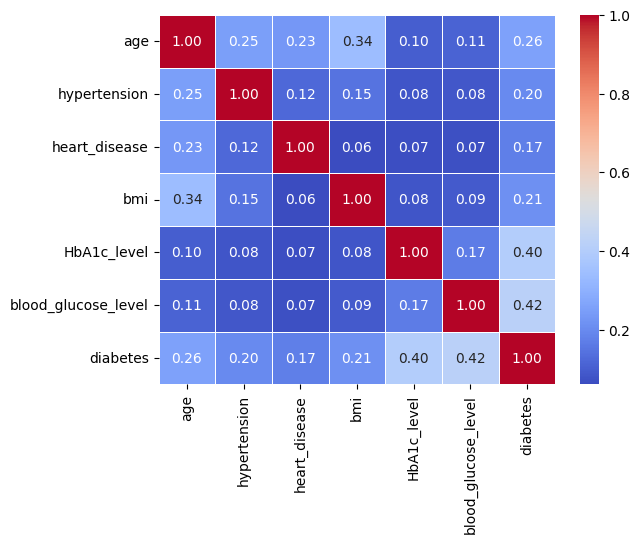

In [ ]:
corr_1 = df.corr(numeric_only=True)

sns.heatmap(corr_1, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.show()

In [ ]:
def categorize_bmi(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi < 24.9:
        return "Normal"
    elif 25 <= bmi < 29.9:
        return "PreObese"
    elif 30 <= bmi < 34.9:
        return "Obese (Class I)"
    elif 35 <= bmi < 39.9:
        return "Obese (Class II)"
    else:
        return "Obese (Class III)"

df["bmi_category"] = df["bmi"].apply(categorize_bmi)


In [ ]:
age_bins = [0, 20, 40, 60, 100]
age_labels = ["0-20", "21-40", "41-60", "61+"]
df["age_group"] = pd.cut(df["age"], bins=age_bins, labels=age_labels, right=False)

In [ ]:
df["risk_score"] = (
    (df['age'] * 0.26) + (df['hypertension'] * 0.20) + (df['heart_disease'] * 0.17) +
    (df['bmi'] * 0.21) + (df['HbA1c_level'] * 0.40) + (df['blood_glucose_level'] * 0.42)
)

# Normalize to 0-100 range
df["risk_score"] = ((df["risk_score"] - df["risk_score"].min()) / \
                   (df["risk_score"].max() - df["risk_score"].min()) * 100).round(2)

def categorize_risk(score):
    if score < 30:
        return "Low"
    elif 30 <= score < 60:
        return "Medium"
    else:
        return "High"

df["risk_category"] = df["risk_score"].apply(categorize_risk)


In [ ]:
df.head()

gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes bmi_category age_group  \
0          6.6                  140         0     PreObese       61+   
1          6.6                   80         0     PreObese     41-60   
2          5.7                  158         0     PreObese     21-40   
3          5.0                  155         0       Normal     21-40   
4          4.8                  155         0       Normal       61+   

   risk_score risk_category  
0       41.01        Medium  
1       14.95           Low  
2       36.04        Medium  
3       35.82        Medium  
4       44.04        Medium

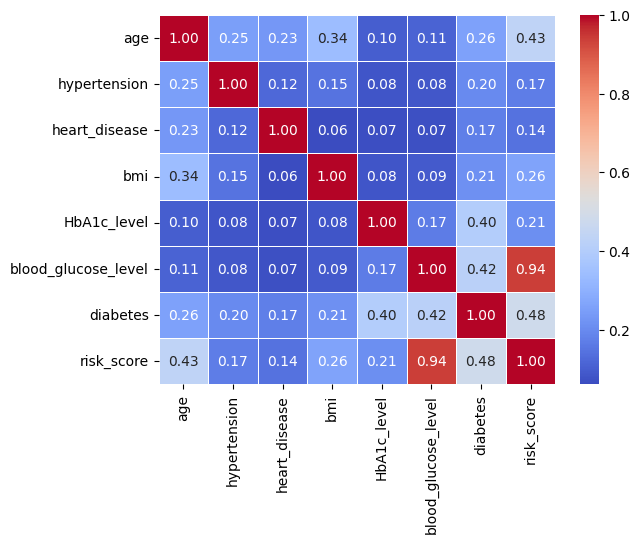

In [ ]:
corr_2 = df.corr(numeric_only=True)

sns.heatmap(corr_2, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.show()

In [ ]:
labels = ["Non-Diabetic", "Diabetic"]
values = df["diabetes"].value_counts().tolist()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0, 0.2])])
fig.update_layout(title_text="Diabetes Class Distribution")

fig.show()

In [ ]:
import plotly.express as px
fig = px.histogram(df, x="diabetes", color="gender", pattern_shape="diabetes")
fig.update_layout(bargap=0.4)
fig.show()

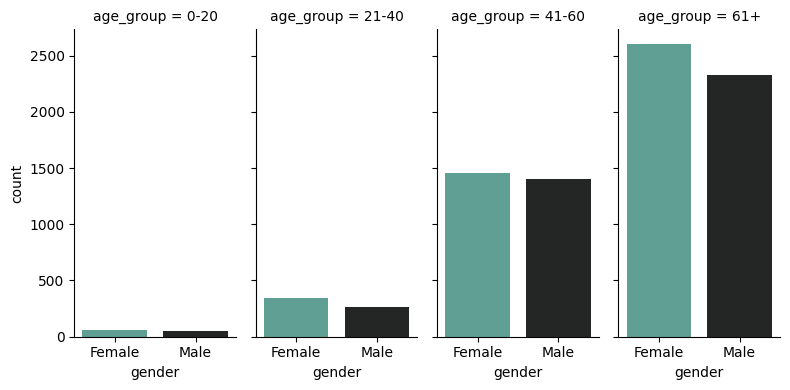

In [ ]:
df_diabetic = df[df["diabetes"] == 1]

ax =  sns.catplot(
      data=df_diabetic, kind="count",
      x="gender", col="age_group",
      height=4, aspect=0.5,
      palette="dark:#5A9_r", hue = "gender"
  )

plt.show()

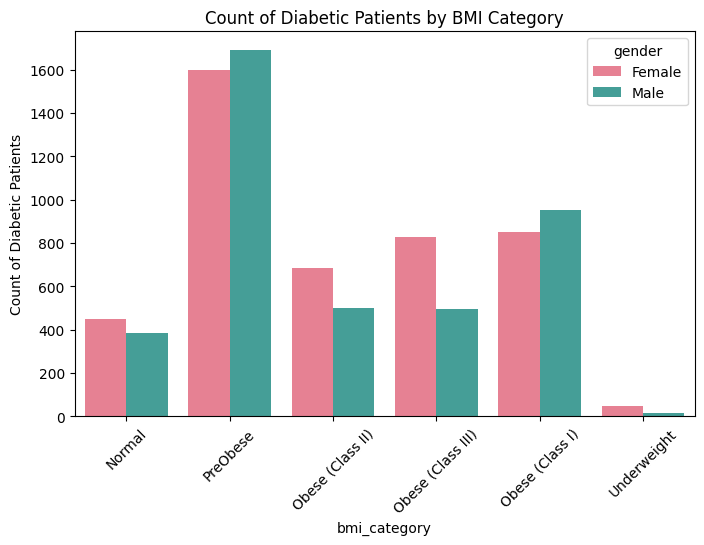

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x=df_diabetic["bmi_category"], y=df_diabetic["diabetes"],
            palette="husl", hue = df_diabetic["gender"],
            estimator=lambda x: len(x), ax=ax)

ax.set_title("Count of Diabetic Patients by BMI Category")
ax.set_ylabel("Count of Diabetic Patients")
plt.xticks(rotation=45)

plt.show()

In [ ]:
smoking_counts = df_diabetic["smoking_history"].value_counts().reset_index()
smoking_counts.columns = ["Smoking History", "Count"]

fig = px.bar(smoking_counts, x="Smoking History", y="Count",
             title="Diabetes Cases by Smoking History (Only Diabetics)",
             color="Smoking History",
             text="Count")

fig.update_traces(textposition="outside")
fig.show()

In [ ]:
fig = px.scatter(df, x="risk_category", y="risk_score", color="diabetes",
                 title="Diabetes Risk Distribution by Risk Category")

fig.update_layout(xaxis=dict(categoryorder="array", categoryarray=["Low", "Medium", "High"]))

fig.show()

In [ ]:
fig = px.scatter(df, x="blood_glucose_level", y="risk_score", color="HbA1c_level", facet_col="gender", facet_row="diabetes", text="age")
fig.show()

In [ ]:
df["Comorbidity"] = df.apply(lambda row:
    "Both" if row["hypertension"] == 1 and row["heart_disease"] == 1 else
    "Hypertension Only" if row["hypertension"] == 1 else
    "Heart Disease Only" if row["heart_disease"] == 1 else
    "No Comorbidities", axis=1)

comorbidity_counts = df.groupby(["Comorbidity", "diabetes"]).size().reset_index(name="Count")

comorbidity_counts["diabetes"] = comorbidity_counts["diabetes"].map({0: "Non-Diabetic", 1: "Diabetic"})

fig = px.bar(comorbidity_counts, x="Comorbidity", y="Count", color="diabetes",
             title="Diabetes and Non-Diabetes Counts by Comorbidity Condition",
             labels={"Comorbidity": "Comorbidity Condition", "Count": "Count of People", "diabetes": "Diabetes Status"},
             barmode="group")

fig.show()


# **Preprocessing**

# **1. Handling Outlier**

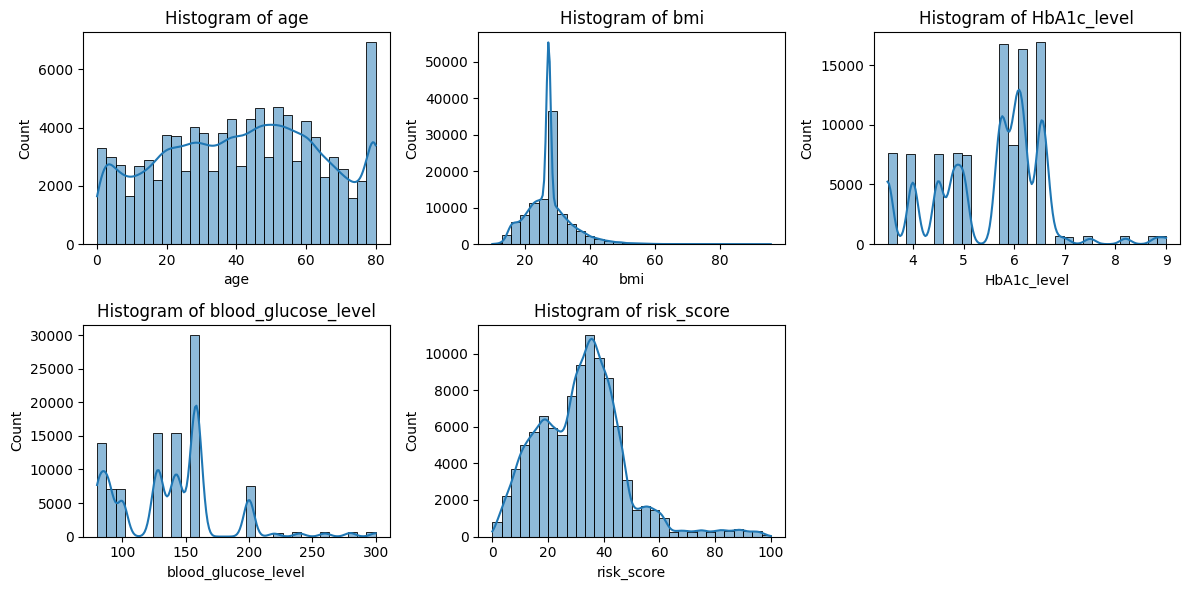

In [ ]:
feat = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'risk_score']

plt.figure(figsize=(12, 6))
for i, feat in enumerate(feat, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feat], kde=True, bins=30)
    plt.title(f'Histogram of {feat}')

plt.tight_layout()
plt.show()

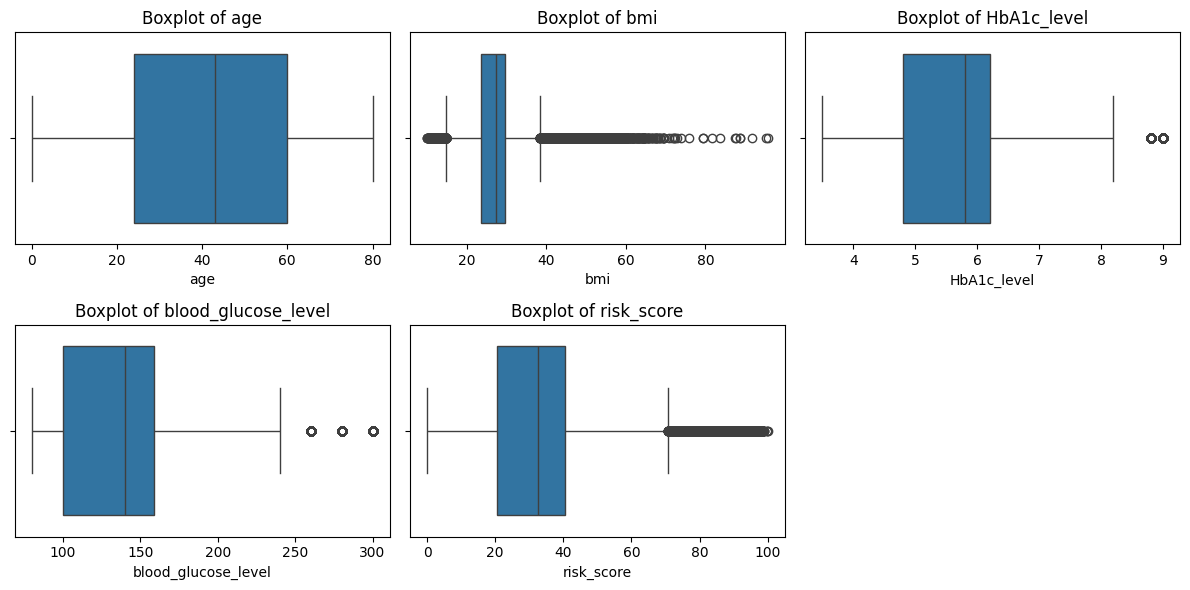

In [ ]:
feat = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'risk_score']

plt.figure(figsize=(12, 6))
for i, feature in enumerate(feat, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

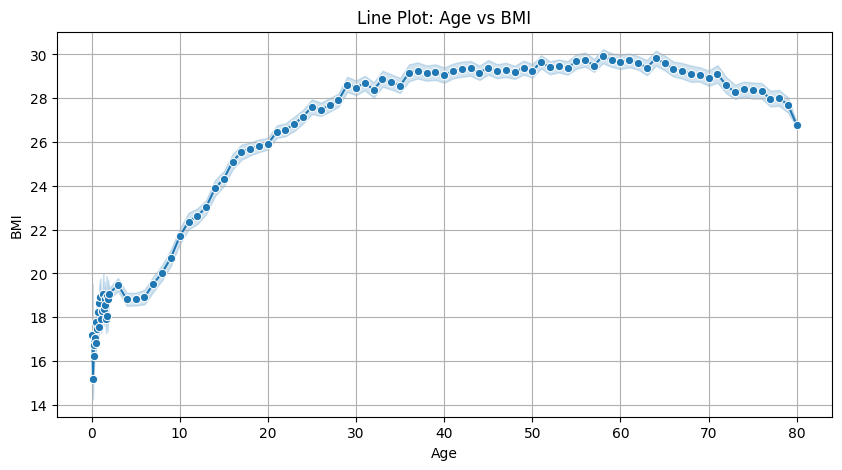

In [ ]:
df_sorted = df.sort_values(by='age')

# Plot Line Graph
plt.figure(figsize=(10, 5))
sns.lineplot(x=df_sorted['age'], y=df_sorted['bmi'], marker='o', linestyle='-')

# Labels & Title
plt.xlabel("Age")
plt.ylabel("BMI")
plt.title("Line Plot: Age vs BMI")
plt.grid(True)

# Show Plot
plt.show()


# **BMI**

In [ ]:
print("Skewness of BMI:", df['bmi'].skew())

Skewness of BMI: 1.0438355183081105


In [ ]:
df['bmi_log'] = np.log(df['bmi'])

In [ ]:
print("Skewness of BMI:", df['bmi_log'].skew())

Skewness of BMI: -0.1391578935995456


In [ ]:
mean_bmi_log = df['bmi_log'].mean()
std_bmi_log = df['bmi_log'].std()

upper_limit_bmi = mean_bmi_log + (1.8 * std_bmi_log)
lower_limit_bmi = mean_bmi_log - (1.8 * std_bmi_log)

df['bmi_cleaned'] = np.where(df['bmi_log'] > upper_limit_bmi, upper_limit_bmi,
                             np.where(df['bmi_log'] < lower_limit_bmi, lower_limit_bmi, df['bmi_log']))

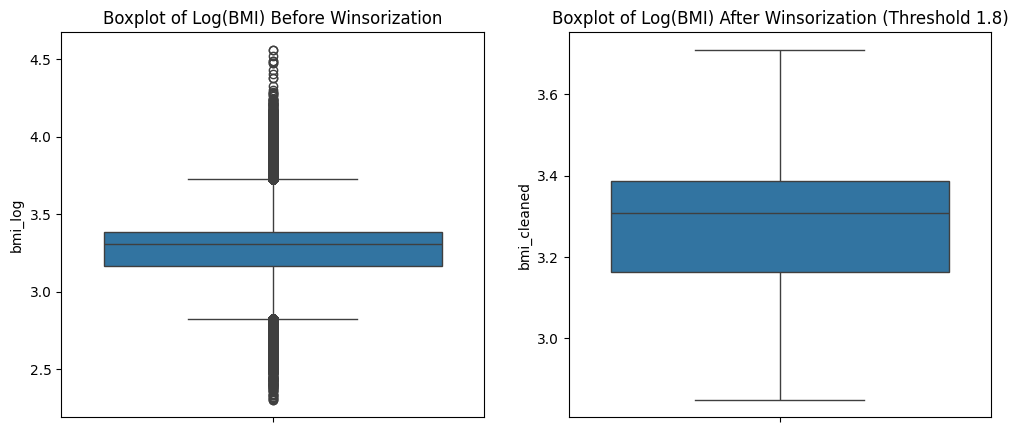

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['bmi_log'])
plt.title("Boxplot of Log(BMI) Before Winsorization")

plt.subplot(1, 2, 2)
sns.boxplot(y=df['bmi_cleaned'])
plt.title("Boxplot of Log(BMI) After Winsorization (Threshold 1.8)")

plt.show()

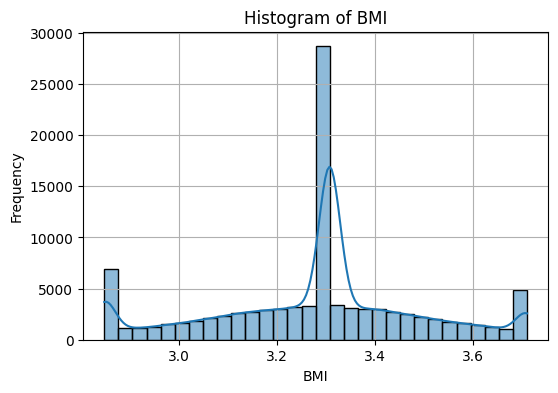

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(df['bmi_cleaned'], kde=True, bins=30)
plt.title("Histogram of BMI")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.grid(True)

plt.show()

# **Risk Score**

In [ ]:
mean_risk = df['risk_score'].mean()
std_risk = df['risk_score'].std()

upper_limit_risk = mean_risk + (2.5 * std_risk)-5
lower_limit_risk = mean_risk - (2.5 * std_risk)

df['risk_score_cleaned'] = np.where(df['risk_score'] > upper_limit_risk, upper_limit_risk,
                             np.where(df['risk_score'] < lower_limit_risk, lower_limit_risk, df['risk_score']))

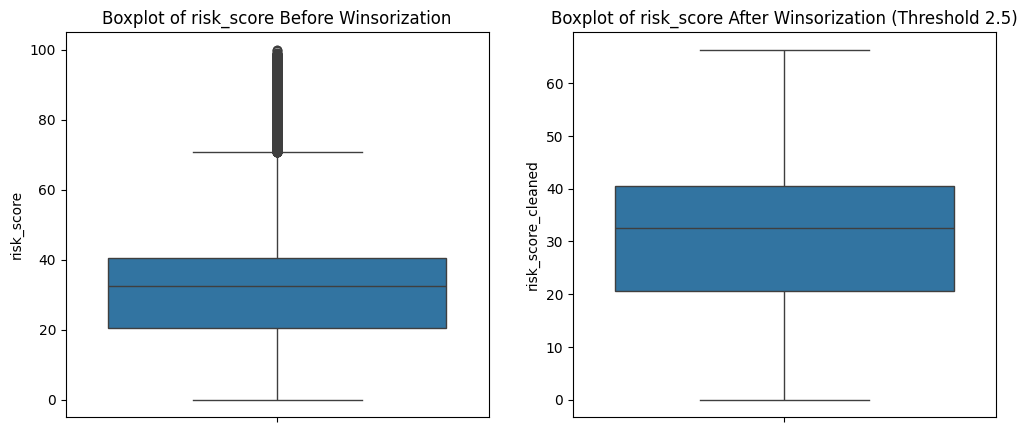

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['risk_score'])
plt.title("Boxplot of risk_score Before Winsorization")

plt.subplot(1, 2, 2)
sns.boxplot(y=df['risk_score_cleaned'])
plt.title("Boxplot of risk_score After Winsorization (Threshold 2.5)")

plt.show()

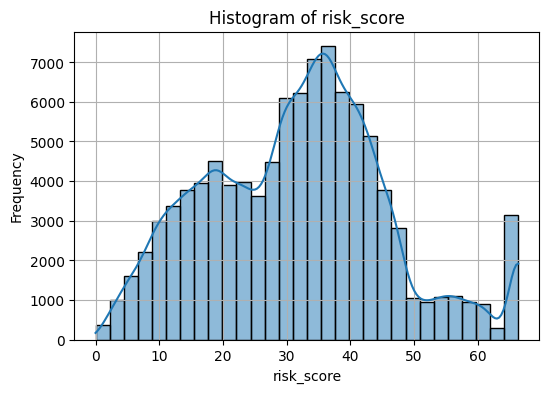

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(df['risk_score_cleaned'], kde=True, bins=30)
plt.title("Histogram of risk_score")
plt.xlabel("risk_score")
plt.ylabel("Frequency")
plt.grid(True)

plt.show()

In [ ]:
df.head()

gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes bmi_category age_group  \
0          6.6                  140         0     PreObese       61+   
1          6.6                   80         0     PreObese     41-60   
2          5.7                  158         0     PreObese     21-40   
3          5.0                  155         0       Normal     21-40   
4          4.8                  155         0       Normal       61+   

   risk_score risk_category         Comorbidity   bmi_log  bmi_cleaned  \
0       41.01        Medium  Heart Disease Only  3.226447     3.226447   
1       14.95           Low    No Comorbidities  3.307619     3.307619   
2       36.04        Medium    No Comorbidities  3.307619     3.307619   
3       35.82        Medium    No Comorbidities  3.154870     3.154870   
4       44.04        Medium                Both  3.002708     3.002708   

   risk_score_cleaned  
0               41.01  
1               14.95  
2               36.04  
3               35.82  
4               44.04

In [ ]:
# Drop the columns after removing outlier
df = df.drop(['bmi', 'bmi_log', 'risk_score'], axis=1)

In [ ]:
df.shape

(100000, 14)

In [ ]:
df.head()

gender   age  hypertension  heart_disease smoking_history  HbA1c_level  \
0  Female  80.0             0              1           never          6.6   
1  Female  54.0             0              0         No Info          6.6   
2    Male  28.0             0              0           never          5.7   
3  Female  36.0             0              0         current          5.0   
4    Male  76.0             1              1         current          4.8   

   blood_glucose_level  diabetes bmi_category age_group risk_category  \
0                  140         0     PreObese       61+        Medium   
1                   80         0     PreObese     41-60           Low   
2                  158         0     PreObese     21-40        Medium   
3                  155         0       Normal     21-40        Medium   
4                  155         0       Normal       61+        Medium   

          Comorbidity  bmi_cleaned  risk_score_cleaned  
0  Heart Disease Only     3.226447               41.01  
1    No Comorbidities     3.307619               14.95  
2    No Comorbidities     3.307619               36.04  
3    No Comorbidities     3.154870               35.82  
4                Both     3.002708               44.04

# **Scaling Encoding**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
nominal_features = ["gender", "smoking_history", "Comorbidity"]
ordinal_features = ["bmi_category", "age_group", "risk_category"]
numerical_features = ['age', 'bmi_cleaned', 'HbA1c_level', 'blood_glucose_level', 'risk_score_cleaned']
passthrough_features = ["hypertension", "heart_disease"]

ordinal_categories = [
    ["Underweight", "Normal", "PreObese", "Obese (Class I)", "Obese (Class II)", "Obese (Class III)"],
    ["0-20", "21-40", "41-60", "61+"],
    ["Low", "Medium", "High"]
]

nominal_transformer = OneHotEncoder(drop='first', sparse_output=False, dtype=np.int64)
ordinal_transformer = OrdinalEncoder(categories=ordinal_categories, dtype=np.int64)
scaler_minmax = MinMaxScaler(feature_range=(0, 1))

preprocessor = ColumnTransformer([
    ("nominal", nominal_transformer, nominal_features),
    ("ordinal", ordinal_transformer, ordinal_features),
    ("num_minmax", scaler_minmax, ["age","bmi_cleaned","blood_glucose_level","HbA1c_level", "risk_score_cleaned"])
],remainder='passthrough')

In [ ]:
X = df.drop(columns=["diabetes"])
y = df["diabetes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [ ]:
pipeline = Pipeline([
    ("preprocessor", preprocessor)
])

X_train_transformed = pipeline.fit_transform(X_train)
X_test_transformed = pipeline.transform(X_test)

In [ ]:
transformed_columns = (
    list(pipeline.named_steps['preprocessor'].named_transformers_['nominal'].get_feature_names_out(nominal_features)) +
    ordinal_features +
    ["age_scaled","bmi_scaled", "blood_glucose_scaled", "HbA1c_scaled", "risk_score_scaled"] +
    passthrough_features
)

In [ ]:
transformed_columns

['gender_Male',
 'gender_Other',
 'smoking_history_current',
 'smoking_history_ever',
 'smoking_history_former',
 'smoking_history_never',
 'smoking_history_not current',
 'Comorbidity_Heart Disease Only',
 'Comorbidity_Hypertension Only',
 'Comorbidity_No Comorbidities',
 'bmi_category',
 'age_group',
 'risk_category',
 'age_scaled',
 'bmi_scaled',
 'blood_glucose_scaled',
 'HbA1c_scaled',
 'risk_score_scaled',
 'hypertension',
 'heart_disease']

In [ ]:
X_train_transformed = pd.DataFrame(X_train_transformed, columns=transformed_columns)
X_test_transformed = pd.DataFrame(X_test_transformed, columns=transformed_columns)

In [ ]:
X_train_transformed.head()

gender_Male  gender_Other  smoking_history_current  smoking_history_ever  \
0          0.0           0.0                      0.0                   0.0   
1          1.0           0.0                      0.0                   0.0   
2          0.0           0.0                      0.0                   0.0   
3          0.0           0.0                      0.0                   0.0   
4          1.0           0.0                      0.0                   0.0   

   smoking_history_former  smoking_history_never  smoking_history_not current  \
0                     0.0                    1.0                          0.0   
1                     0.0                    1.0                          0.0   
2                     0.0                    1.0                          0.0   
3                     0.0                    0.0                          0.0   
4                     0.0                    1.0                          0.0   

   Comorbidity_Heart Disease Only  Comorbidity_Hypertension Only  \
0                             0.0                            0.0   
1                             0.0                            0.0   
2                             0.0                            0.0   
3                             0.0                            0.0   
4                             0.0                            0.0   

   Comorbidity_No Comorbidities  bmi_category  age_group  risk_category  \
0                           1.0           4.0        2.0            1.0   
1                           1.0           3.0        2.0            1.0   
2                           1.0           4.0        3.0            1.0   
3                           1.0           3.0        1.0            0.0   
4                           1.0           3.0        1.0            1.0   

   age_scaled  bmi_scaled  blood_glucose_scaled  HbA1c_scaled  \
0    0.599600    0.861801              0.227273      0.090909   
1    0.624625    0.667704              0.340909      0.418182   
2    0.787287    0.922036              0.545455      0.000000   
3    0.449449    0.805690              0.045455      0.090909   
4    0.486987    0.771575              0.545455      0.418182   

   risk_score_scaled  hypertension  heart_disease  
0           0.476790           0.0            0.0  
1           0.607933           0.0            0.0  
2           0.892379           0.0            0.0  
3           0.225356           0.0            0.0  
4           0.814296           0.0            0.0

In [ ]:
X_train_transformed.shape, X_test_transformed.shape

((80000, 20), (20000, 20))

# **Evaluating Score Based Classification Model**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n🔹 {model_name} Accuracy: {accuracy:.4f}\n")

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()



🔹 Logistic Regression Accuracy: 0.9644

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18299
           1       0.91      0.65      0.76      1701

    accuracy                           0.96     20000
   macro avg       0.94      0.82      0.87     20000
weighted avg       0.96      0.96      0.96     20000



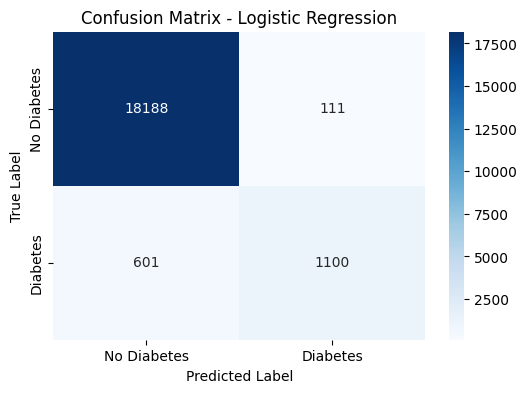

In [ ]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=500)
train_and_evaluate_model(log_reg, X_train_transformed, y_train, X_test_transformed, y_test, "Logistic Regression")


🔹 Support Vector Machine (SVM) Accuracy: 0.9616

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     18299
           1       0.94      0.58      0.72      1701

    accuracy                           0.96     20000
   macro avg       0.95      0.79      0.85     20000
weighted avg       0.96      0.96      0.96     20000



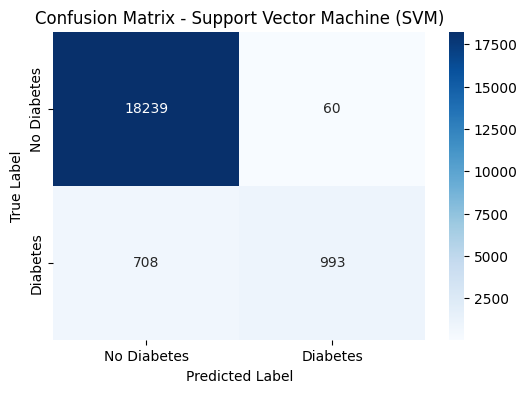

In [ ]:
# Support Vector Machine (SVM)
svm_model = SVC(kernel='linear')
train_and_evaluate_model(svm_model, X_train_transformed, y_train, X_test_transformed, y_test, "Support Vector Machine (SVM)")


🔹 Random Forest Accuracy: 0.9702

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18299
           1       0.94      0.69      0.80      1701

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000



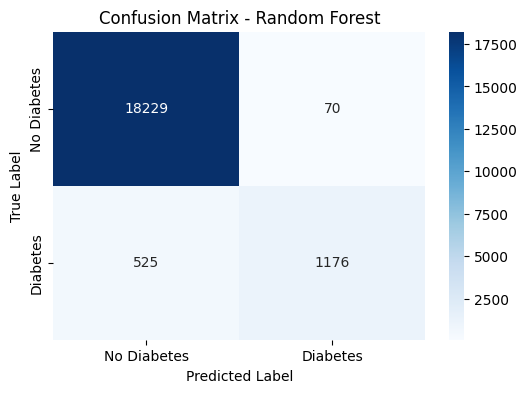

In [ ]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
train_and_evaluate_model(rf_model, X_train_transformed, y_train, X_test_transformed, y_test, "Random Forest")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[11:14:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.





🔹 XGBoost Accuracy: 0.9718

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18299
           1       0.95      0.70      0.81      1701

    accuracy                           0.97     20000
   macro avg       0.96      0.85      0.90     20000
weighted avg       0.97      0.97      0.97     20000



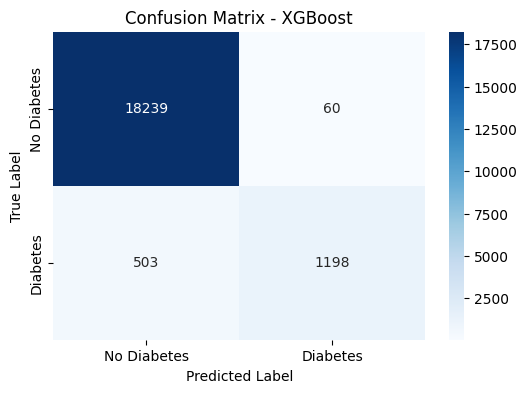

In [ ]:
# XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
train_and_evaluate_model(xgb_model, X_train_transformed, y_train, X_test_transformed, y_test, "XGBoost")